In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_soumu=pd.read_csv('data/cleaned_data/cleaned_soumu2_H30.csv')
df_killing = pd.read_csv('data/cleaned_data/cleaned_killing_H30.csv')

In [3]:
#2つのデータを連結
df = pd.concat([df_soumu, df_killing], axis=1)
df2 = df.drop(['pre', '自治体名'], axis=1)

df2.head()

,寄附件数,寄附金額,寄附件数_県外,寄附金額_県外,返礼品の調達に係る費用,返礼品の送付に係る費用,広報に係る費用,決済等に係る費用,事務に係る費用,引取数,殺処分数
0,3168622,50358549924,3118714,48987269521,16437033669,6419762169,309522663,695831800,4446589374,1669,211
1,215037,2843026253,196812,2486528755,758076684,281172254,43756185,31891470,304998102,780,522
2,296086,5049679191,295478,5006185745,1673287712,444810138,105250639,45270428,549394411,821,303
3,157533,4872952287,157022,4828954362,1736527647,244716518,46904894,79538407,290188123,2017,1093
4,179663,2857455295,179588,2853066795,974141002,249073964,21498580,22880907,264896477,494,285


In [4]:
#全てのデータを標準化
df3 = (df2 - df2.min())/(df2.max()-df2.min())

#VIF統計量を調査 -> 引取数や殺処分数に多重共線性はみられない
r = df3.corr()
VIF = 1 /(1- r**2)

print(VIF.iloc[-2])
print()
print(VIF.iloc[-1])

寄附件数           1.003374
寄附金額           1.008153
寄附件数_県外        1.003452
寄附金額_県外        1.007706
返礼品の調達に係る費用    1.011647
返礼品の送付に係る費用    1.000754
広報に係る費用        1.013356
決済等に係る費用       1.001380
事務に係る費用        1.006096
引取数                 inf
殺処分数           1.607244
Name: 引取数, dtype: float64

寄附件数           1.009151
寄附金額           1.006570
寄附件数_県外        1.008250
寄附金額_県外        1.005644
返礼品の調達に係る費用    1.004164
返礼品の送付に係る費用    1.008302
広報に係る費用        1.005641
決済等に係る費用       1.020555
事務に係る費用        1.015594
引取数            1.607244
殺処分数                inf
Name: 殺処分数, dtype: float64


決定係数(引取数_寄附金額: 0.008087407761204424
決定係数(引取数_寄附件数: 0.003363012172610147
決定係数(引取数_事務に係る費用: 0.006059157178656349
決定係数(殺処分数_寄附金額: 0.0065275362694457995
決定係数(殺処分数_寄附件数: 0.009067654891683263
決定係数(殺処分数_事務に係る費用: 0.015354098401808791


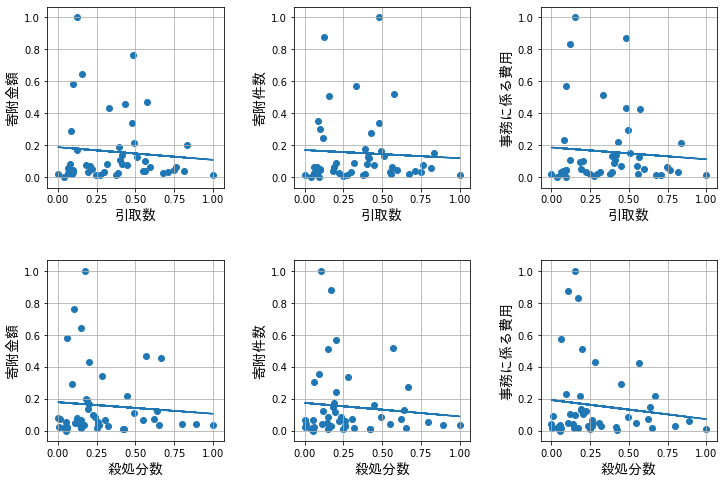

In [5]:
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#フォントの設定
font_path = 'font/ipaexg.ttf'
fp = fm.FontProperties(fname=font_path, size=14)

#グラフの設定
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#データの要素
killing = ['引取数', '殺処分数']
soumu = ['寄附金額', '寄附件数', '事務に係る費用']
ax = []
i = 0

#x, y, modelは上書き、axはリストに追加
for k, K in enumerate(killing):
    x = pd.DataFrame(df3[K])
    
    for s, S in enumerate(soumu):
        y = pd.DataFrame(df3[S])
        

        #線形モデルの構築
        model = LinearRegression().fit(x, y)
        
        #サブプロットの設定
        ax.append(fig.add_subplot(2, 3, i+1))
        ax[i].grid(True)
        ax[i].set_xlabel(K, fontproperties=fp)
        ax[i].set_ylabel(S, fontproperties=fp)

        #散布図を表示
        ax[i].scatter(df3[K], df3[S])
        ax[i].plot(x, model.predict(x))

        #決定係数の算出
        R2 = model.predict(x)
        print('決定係数('+str(K)+'_'+str(S)+': '+str(r2_score(y, R2)))
        i+=1
        
plt.show()